In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten
from tensorflow.keras.layers import Conv2D,UpSampling2D, MaxPooling2D, Conv2DTranspose, Activation, BatchNormalization, Concatenate
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, LearningRateScheduler
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
#loading data
(x_train, _), (x_test, _) = cifar100.load_data()


In [22]:
x_train.shape

(50000, 32, 32, 3)

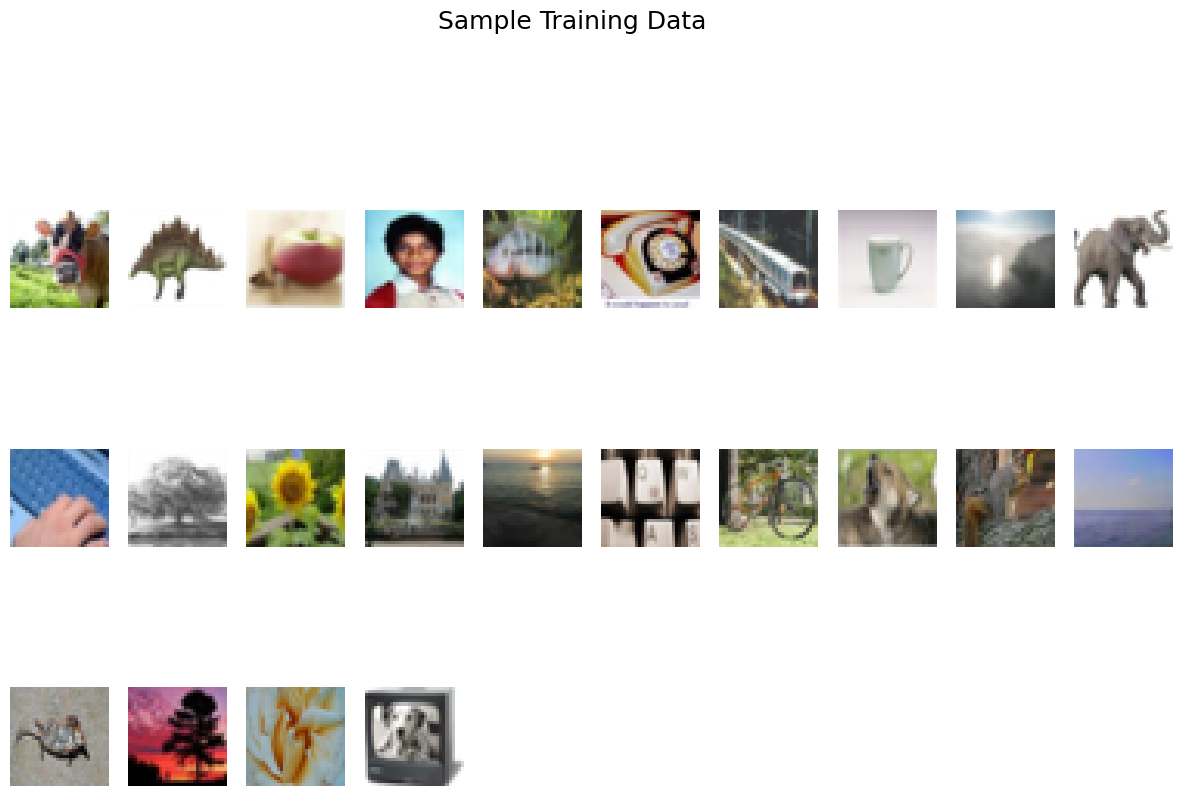

In [23]:
plt.figure(figsize=(15,15))

for i in range(24):
   plt.subplot(5,10,i+1)
   plt.imshow(x_train[i])
   plt.axis("off")


plt.suptitle("Sample Training Data", fontsize = 18)

plt.show()

In [24]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Adding random noise to dataset

In [25]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=0.3, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=0.3, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

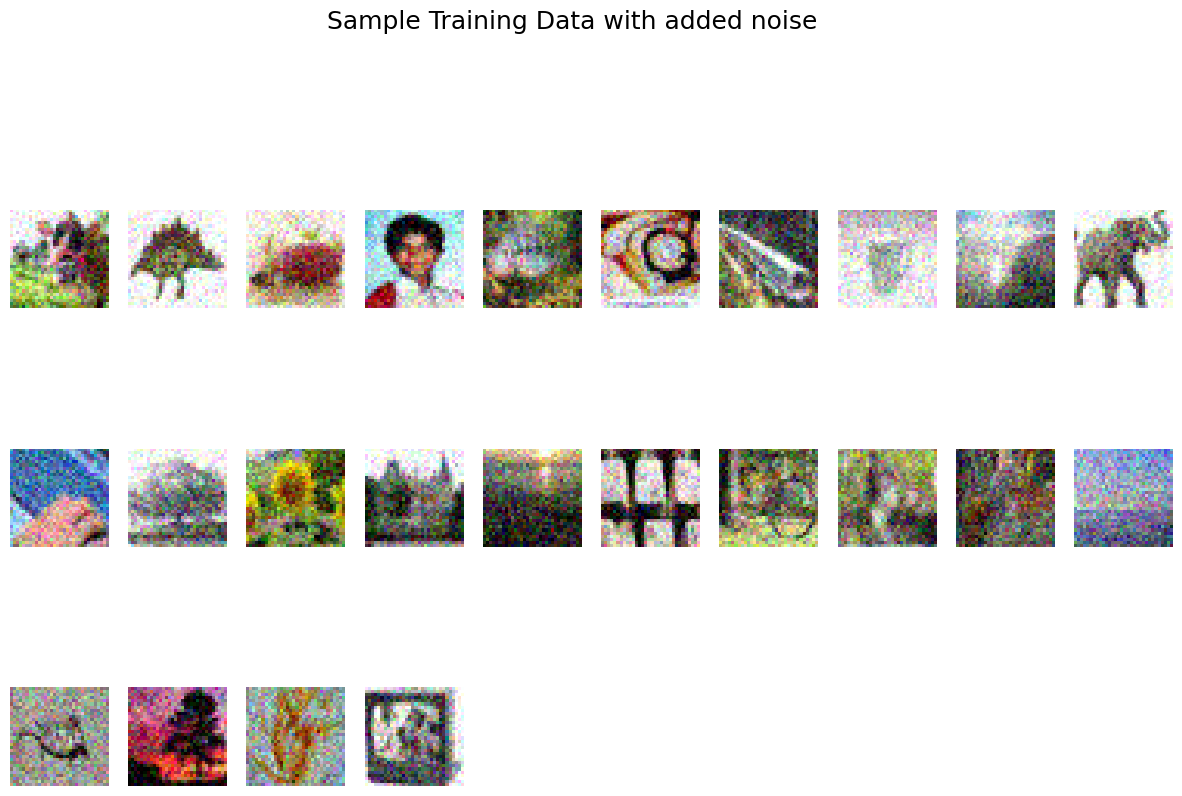

In [33]:
plt.figure(figsize = (15,15))

for i in range(24):
        plt.subplot(5,10,i+1)
        plt.imshow(x_train_noisy[i])
        plt.axis("off")

plt.suptitle("Sample Training Data with added noise", fontsize = 18)
plt.show()

Autoencoder Model


In [27]:
autoencoder = Sequential()

input_shape = (32, 32, 3)
autoencoder.add(Conv2D(32, 3, activation='relu',strides=1, padding='same', input_shape=input_shape))
autoencoder.add(Conv2D(32, 3, activation='relu',strides=1, padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(Conv2D(32, 3, activation='relu',strides=2, padding='same'))
autoencoder.add(Conv2D(32, 3, activation='relu',strides=1, padding='same'))
autoencoder.add(BatchNormalization())

autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(32, 3, activation='relu', strides=1,padding='same'))
autoencoder.add(Conv2D(32, 3, activation='relu',strides=1, padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(Conv2D(32, 3, activation='relu',strides=1, padding='same'))
autoencoder.add(Conv2D(3 ,3, activation='sigmoid',strides=1, padding='same'))

autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_12 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_30 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 conv2d_31 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_13 (Ba  (None, 16, 16, 32)        128       
 tchNormalization)                                    

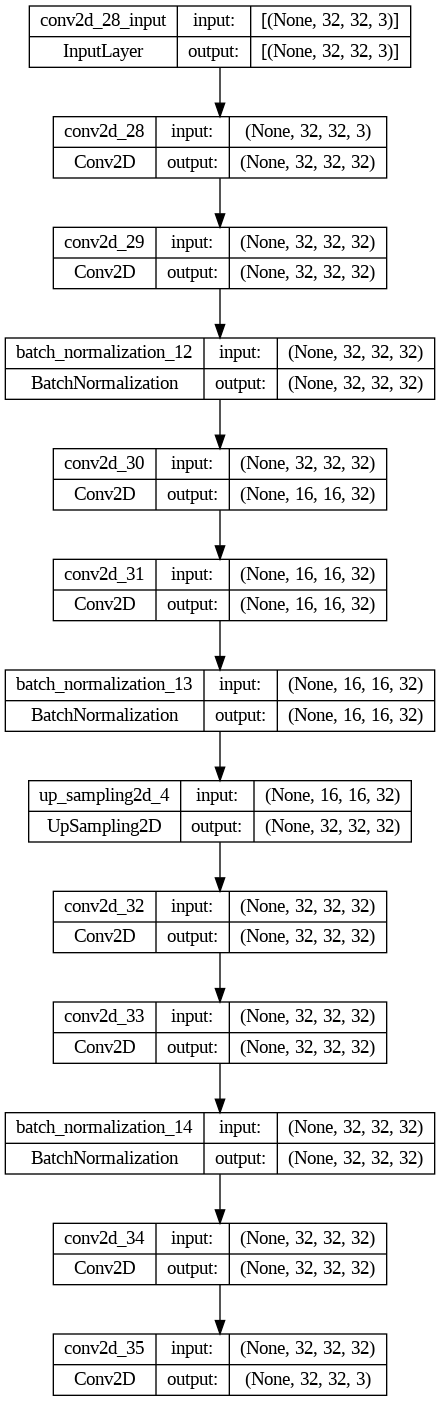

In [37]:
autoencoder.summary()
plot_model(autoencoder, show_shapes=True, show_layer_names=True)

In [30]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
autoencoder.fit(x_train_noisy,x_train,epochs=20,callbacks=[early_stopping],validation_data=(x_test_noisy,x_test),batch_size=128)


Epoch 1/20
391/391 [==============================] - 34s 87ms/step - loss: 0.0025 - accuracy: 0.7711 - val_loss: 0.0026 - val_accuracy: 0.7748
Epoch 2/20
391/391 [==============================] - 27s 69ms/step - loss: 0.0025 - accuracy: 0.7736 - val_loss: 0.0024 - val_accuracy: 0.7251
Epoch 3/20
391/391 [==============================] - 24s 62ms/step - loss: 0.0025 - accuracy: 0.7750 - val_loss: 0.0024 - val_accuracy: 0.7839
Epoch 4/20
391/391 [==============================] - 25s 62ms/step - loss: 0.0024 - accuracy: 0.7777 - val_loss: 0.0024 - val_accuracy: 0.7747
Epoch 5/20
391/391 [==============================] - 24s 63ms/step - loss: 0.0024 - accuracy: 0.7778 - val_loss: 0.0027 - val_accuracy: 0.7513


In [31]:
num_imgs = 48
cifar_test_predicted = autoencoder.predict(x_test) # predict

313/313 [==============================] - 3s 9ms/step


313/313 [==============================] - 3s 10ms/step


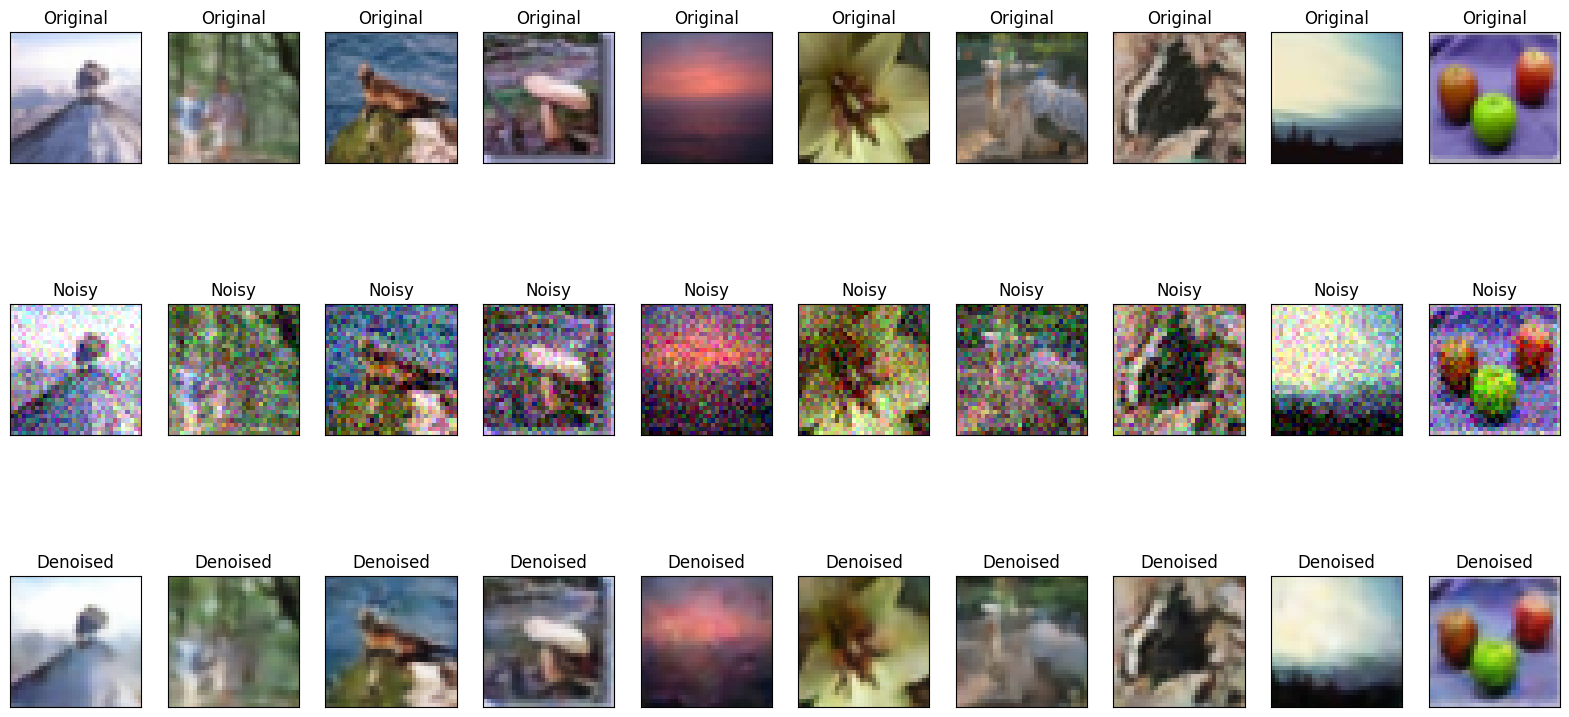

In [32]:
denoised= autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20, 10))
for i in range(n):
    # Original images before addition of noise
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(denoised[i])
    plt.title("Denoised")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()